[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/efviodo/idatha-data-science-course/blob/master/notebooks/04%20-%20DS%20-%20Comprension%20de%20los%20Datos%20-%20R.ipynb)

<img src="https://github.com/efviodo/idatha-data-science-course/raw/master/notebooks/figures/idatha-logo.jpeg" width="100px" height="100px" style="float:left"/>

# Comprensión de los Datos

## Objetivos

- Presentar una guía para familiarizarse con los datos
- Explicar que es el análisis de la calidad en ciencia de datos
- Comprender la importancia de la calidad en ciencia de datos
- Presentar algunas herramientas para hacer un perfil de datos

<a id='Indice'></a>
## Índice
[Inicio ▲](#Indice)

1. [Dependencias](#Dependencias)
1. [Comprensión de los Datos](#Comprension-Datos)
    1. [Objetivos](#Comprension-Objetivos)
    1. [Recopilación de los Datos](#Recopilacion-Datos)
    1. [Exploracion de los datos](#Exploracion-Datos)
        1. [Ejemplo Censo de Arbolado](#Ejemplo-Censo-Arbolado)
    1. [Verificación de la Calidad](#Verificacion-Calidad)
1. [Data Profiling](#Data-Profiling)
1. [Calidad de Datos (OPCIONAL)](#Calidad-Datos)
    1. [Definición](#Definicion)
1. [Bibliografia](#Bibliografia)

## Dependencias

In [2]:
library(downloader)  # para descargar archivos
library(dplyr)  # Para manejo de data frames


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



<a id='Comprension-Datos'></a>
## Comprensión de los Datos
[Inicio ▲](#Indice)

<a id='Comprension-Objetivos'></a>
### Objetivos
Trabajar con los datos del cliente lo más cerca posible, comprendiéndolos, formulando y validando hipótesis (sobre los datos y sobre que podemos hacer con ellos), validando requerimientos de negocio y ajustando expectativas del cliente.

**Etapas**
- Recopilar datos disponibles.
- Explorar y describir los datos con tablas y gráficos.
- Verificar calidad de los datos.

<a id='Recopilacion-Datos'></a>
### Recopilacion de los Datos
Recolección inicial de datos, disponibilizando los datos al equipo de analístas y científicos de datos, para comenzar a trabajar. Vimos técnicas para la recopilación de datos en el módulo anterior, cuando estudiamos la etapa de ingesta de datos y estudiamos ejemplos para la adquisición de datos a través de web services, lectura de archivos CSV, XML, etc.

**Lineamientos generales**
- Obtener datos para su exploración y análisis.
- Contar con acceso a los mismos (credenciales base de datos, APIs, etc), o tener una copia local.
- Contar con meta-data o documentación sobre los datos.

**Checklist**:
- Atributos relevantes o “prometedores”.
- Atributos no relevantes.
- Data matching y data fusion.
- Valores faltantes.


<a id='Exploracion-Datos'></a>
### Exploración de los datos
Una vez que tenemos acceso a los datos, comenzamos a familiarizarnos con los mismos, analizando propiedades generales del cojunto de datos como el volúmen y la estructura general: 

- **¿Cuántos datos tenemos?** Por ejemplo cuantos datasets, cuantos registros en cada uno.
- **¿Qué atributos hay?** Por ejemplo, cuantas columnas tiene un archivo CSV
- **¿Cuál es la semántica de cada atributo?** Revisamos metadatos o documentación para entender la semántica (también podemos consultar/validar con el cliente).
- **¿Cual es el tipo de datos de cada atributo y que codificación se utiliza?** Estudiamos el tipo de cada atributo, si es ```String```, ```int```, ```float```, etc. En algunas fuentes podemos inferir el tipo de la propia fuente (ej: DB relacional) y en otros debemos recurrir a documentación o analizando los valores de los propios datos (ej: archivos de texto plano). 

En esta etapa nos apoyamos en las herramientas que tenemos. Por ejemplo, explorar los datos mediantes tablas, tomando una muestra pequeña (10, 20, 50) de los primeros registros o de forma aleatoria. Investigar para los atributos más prometedores los valores promedios, mínimos máximos, ver gráficos con la distribución de cada variable, gráficos de correlación, etc.

Otro recurso muy útil es hacer gráficos con visualizaciones que nos permitan comprender mejor la naturaleza de los datos. Por último tabién es bueno hacer consultas sobre los datos que nos permitan contestar supuestos como determinar cual es el atributo que identifica a un dato (estudio de unicidad), o analizar la consistencia.

**Librerías útiles**

Cada lenguaje tiene herramientas que nos facilitan esta tarea.

- **R**
    - [DataExplorer](https://cran.r-project.org/web/packages/DataExplorer/vignettes/dataexplorer-intro.html) Muy últil para esta etapa y para hacer un perfil de los datos.
    - [Hmisc](https://cran.r-project.org/web/packages/Hmisc/index.html), [pastecs](https://cran.r-project.org/web/packages/pastecs/index.html), [psych](https://cran.r-project.org/web/packages/psych/index.html).
    - Funciones de R  como ```colnames```, ```head```, ```summary```

<a id='Ejemplo-Censo-Arbolado'></a>
#### Ejemplo: Censo de Arbolado
Vamos a descargar y analizar datos del censo de arboladoo público de la ciudad de Montevideo. Estos datos se encuentran públicos en el catálogo de datos abiertos del estado, y nos ayudarán a entender como acercanos a un dataset.

https://catalogodatos.gub.uy/dataset/censo-de-arbolado-2008

**1. Descarga de los datos**

In [3]:
# URL del dataset
url <- "https://raw.githubusercontent.com/efviodo/data-science/master/datasets/datos-abiertos-uy/censo-arbolado-mvdo/archivo_comunal1.csv"

# Descargo el dataset a un archivo temporal y lo abro en un dataframe
datasetFilename <- "datos.csv"
if (!file.exists(datasetFilename)) download(url, datasetFilename)

# dataset <- read.csv(datasetFilename)

delim = "," 
dec = "."
quote = "\""
dataset <- read.csv(datasetFilename, header=TRUE, sep=delim, quote=quote, dec=dec) %>% data.frame()


**2. Familiarizandonos con los datos**

¿Que columnas tenemos en el CSV que cargamos?

In [50]:
colnames(dataset)

[1] "Arbol"             "Cod.Calle"         "Calle"            
 [4] "Cod.Entre"         "Entre"             "Cod.Y"            
 [7] "Y"                 "Numero"            "Ajuste"           
[10] "Acera"             "Alineacion"        "Ordinal"          
[13] "Ancho.Vereda"      "Distancia"         "CAP"              
[16] "Altura"            "Diametro.Copa"     "EV"               
[19] "Int.Aerea"         "Int.Sub"           "Genero"           
[22] "Especie"           "Nombre.científico"

Quiero ver algunas filas de datos para ver algunos ejemplos...

In [52]:
# Devuelve los primeros 5 registros en el dataframe
head(dataset, 10)

Arbol,Cod.Calle,Calle,Cod.Entre,Entre,Cod.Y,Y,Numero,Ajuste,Acera,⋯,Distancia,CAP,Altura,Diametro.Copa,EV,Int.Aerea,Int.Sub,Genero,Especie,Nombre.científico
1833,7572,18 DE JULIO AVENIDA,4800,HERRERA Y OBES JULIO,6012,RIO NEGRO,,S/N,P,⋯,0,14,2,,2,N,N,28,1,Enterolobium contortisiliquum
1834,7572,18 DE JULIO AVENIDA,4800,HERRERA Y OBES JULIO,6012,RIO NEGRO,,S/N,P,⋯,0,14,2,,2,N,N,28,1,Enterolobium contortisiliquum
1835,7572,18 DE JULIO AVENIDA,4800,HERRERA Y OBES JULIO,6012,RIO NEGRO,,S/N,P,⋯,0,15,2,,2,N,N,28,1,Enterolobium contortisiliquum
4780,7572,18 DE JULIO AVENIDA,3492,PLAZA INDEPENDENCIA,354,ANDES,839,,I,⋯,5,250,7,3,2,N,N,63,2,Platanus occidentalis
4781,7572,18 DE JULIO AVENIDA,3492,PLAZA INDEPENDENCIA,354,ANDES,843,,I,⋯,5,200,4,2,2,N,N,63,2,Platanus occidentalis
4783,7572,18 DE JULIO AVENIDA,3492,PLAZA INDEPENDENCIA,354,ANDES,0,s/n,P,⋯,5,22,5,2,2,N,N,63,2,Platanus occidentalis
4785,7572,18 DE JULIO AVENIDA,354,ANDES,3852,CONVENCION,857,,I,⋯,5,18,5,3,2,N,N,63,2,Platanus occidentalis
4786,7572,18 DE JULIO AVENIDA,354,ANDES,3852,CONVENCION,857,,I,⋯,5,25,5,03/05/10,2,N,N,63,2,Platanus occidentalis
4788,7572,18 DE JULIO AVENIDA,354,ANDES,3852,CONVENCION,885,,I,⋯,5,36,6,3,2,S,N,63,2,Platanus occidentalis
4789,7572,18 DE JULIO AVENIDA,354,ANDES,3852,CONVENCION,891,,I,⋯,5,35,6,3,2,N,N,63,2,Platanus occidentalis


En términos generales, que valores toman cada columna del dataframe: mínimos, máximos, promedios, ¿Hay valores repetidos?

In [43]:
# mean,median,25th and 75th quartiles,min,max
summary(dataset, digits=4)

     Arbol        Cod.Calle                      Calle        Cod.Entre   
 1      :   1   5115   : 277   PARAGUAY             : 277   5115   : 281  
 100    :   1   6141   : 230   RONDEAU AVENIDA GRAL.: 230   2265   : 227  
 1000   :   1   2265   : 227   CUAREIM              : 227   6141   : 221  
 1001   :   1   2481   : 158   EJIDO                : 158   1545   : 173  
 1003   :   1   3742   : 148   LANZA DR. AQUILES R. : 148   4140   : 161  
 1004   :   1   4140   : 145   MALDONADO            : 145   6627   : 161  
 (Other):4904   (Other):3725   (Other)              :3725   (Other):3686  
                   Entre          Cod.Y                          Y       
 PARAGUAY             : 281   2265   : 235   CUAREIM              : 235  
 CUAREIM              : 227   6141   : 217   RONDEAU AVENIDA GRAL.: 217  
 RONDEAU AVENIDA GRAL.: 221   6300   : 179   SAN JOSE             : 179  
 CANELONES            : 173   6627   : 173   SORIANO              : 173  
 MALDONADO            : 161   

Nuestro dataset no es uy amigable para un análisis de distribución estadístico. Probemos con otro más amigable.

This data gives peak accelerations measured at various observation stations for 23 earthquakes in California. The data have been used by various workers to estimate the attenuating affect of distance on ground acceleration.

Referencia: [https://www.rdocumentation.org/packages/datasets/versions/3.6.1/topics/attenu](https://www.rdocumentation.org/packages/datasets/versions/3.6.1/topics/attenu)

In [1]:
colnames(attenu)

[1] "event"   "mag"     "station" "dist"    "accel"

In [2]:
head(attenu)

event,mag,station,dist,accel
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,7.0,117,12,0.359
2,7.4,1083,148,0.014
2,7.4,1095,42,0.196
2,7.4,283,85,0.135
2,7.4,135,107,0.062
2,7.4,475,109,0.054


In [44]:
summary(attenu, digits = 4)
# head(attenu)

     event            mag           station         dist       
 Min.   : 1,00   Min.   :5,000   117    :  5   Min.   :  0,50  
 1st Qu.: 9,00   1st Qu.:5,300   1028   :  4   1st Qu.: 11,32  
 Median :18,00   Median :6,100   113    :  4   Median : 23,40  
 Mean   :14,74   Mean   :6,084   112    :  3   Mean   : 45,60  
 3rd Qu.:20,00   3rd Qu.:6,600   135    :  3   3rd Qu.: 47,55  
 Max.   :23,00   Max.   :7,700   (Other):147   Max.   :370,00  
                                 NA's   : 16                   
     accel        
 Min.   :0,00300  
 1st Qu.:0,04425  
 Median :0,11300  
 Mean   :0,15422  
 3rd Qu.:0,21925  
 Max.   :0,81000  
                  

Usando el package [Hmisc](https://cran.r-project.org/web/packages/Hmisc/index.html), también podemos sacar algunas estadísticas.

In [45]:
# install.packages('Hmisc')  Descomentar para instalar
library(Hmisc)

describe(dataset)

dataset 

 23  Variables      4910  Observations
--------------------------------------------------------------------------------
Arbol 
       n  missing distinct 
    4910        0     4910 

lowest : 1     100   1000  1001  1003 , highest: 997   998   999   Arbol fin  
--------------------------------------------------------------------------------
Cod.Calle 
       n  missing distinct 
    4910        0       81 

lowest :       126   1482  1545  1603 , highest: 7572  7617  7618  8316  Calle
--------------------------------------------------------------------------------
Calle 
       n  missing distinct 
    4910        0       80 

lowest :                             18 DE JULIO AVENIDA         25 DE AGOSTO                25 DE AGOSTO DE 1825 RAMBLA ACUÑA DE FIGUEROA FRANCISCO
highest: VENEZUELA                   WASHINGTON                  YACARE                      YAGUARON                    YI                         
--------------------------------------------------------

Existen infinidad de librerias que implementan análisis estadísticos básicos sobre un dataset. Un buen ejercicio es probar varias e investigar que ventajas y desventajas tiene cada una.

Algunas consultas que se me ocurre hacer

- Analizar la altura de los arboles
- Analizar la apertura de las copas

<a id='Verificacion-Calidad'></a>
### Verificación de la Calidad

Inmediatamente después de familiarizamos con los datos, lo segundo que hacemos (pero no por ello menos importante) es analizar la calidad de los datos. No vamos a hacer un estudio exhaustio de la calidad, simplemente vamos a prestar atención a algunos problemas comúnes y que pueden complicar nuestro análisis. 

- Datos perdidos: valores vacíos o “sin respuesta” (significado de nulo).
- Errores en datos: errores tipográficos por acción humana.
- Error de mediciones: sistema de medidas incongruente.
- Incoherencias en codificación: diferente representación para valores iguales.
- Metadatos erróneos: significado aparente y definición real.

Algunas veces contamos con herramientas que verifican estos puntos como parte del data profiling, y algunas veces tenemos que hacer consultas sobre el dataframe, para sacar las estadísticas de cada caso. 

### Data Profiling
[Inicio ▲](#Indice)

Un perfil de datos o también conocido como *"data profiling"* es una primera aproximación al estado de calidad en un dataset. Generalmente se realiza en la etapa de comprensión de los datos para otener información relevante como mínimos, máximos, promedios de atributos, cantidad de valores nulos o inválidos, determinar los valores más comunes etc.

Usualmente, se utilizan herramientas que realizan un reporte de forma automática, midiendo determinadas variables de calidad y que permiten conocer de forma aproximada el estado de algunas dimensiones de calidad.

Podemos obtener datos brutos sobre el dataframe:

In [46]:
# install.packages('DataExplorer') Descomentar para instalar 
library(DataExplorer); library(dplyr)  

# Información básica sobre el dataset
introduce(dataset)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
4910,23,23,0,0,0,4910,112930,954384


Tambien podemos discriminar los atributos del dataframe en variables **continuas** y **discretas**, lo cual será muy útil para diseñar consultas y gráficas que nos permitan conocer mejor los datos sobre estas variables.

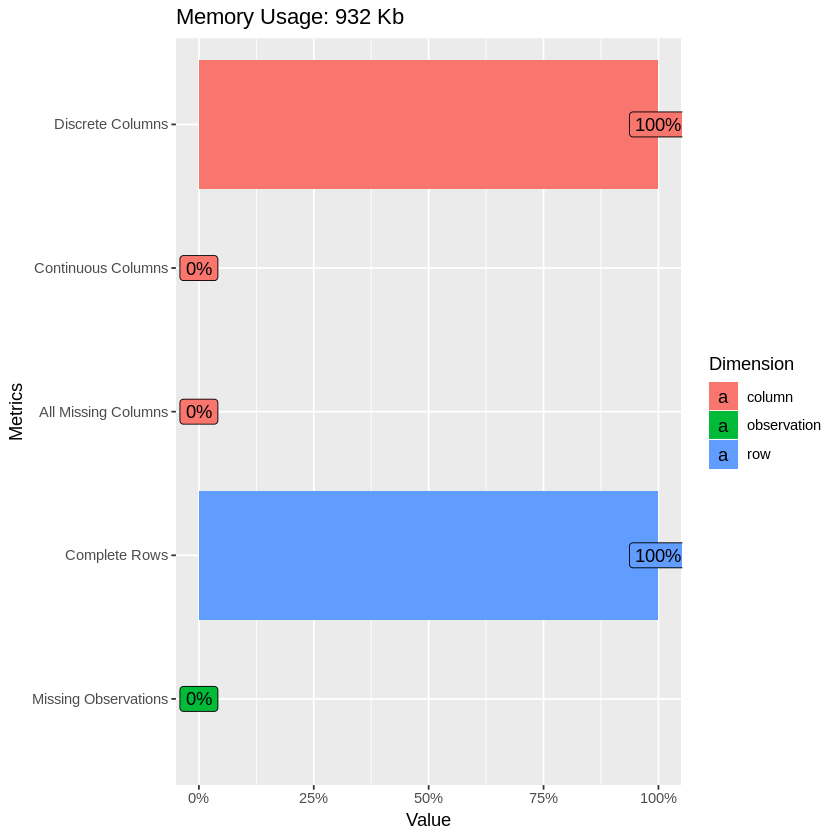

In [47]:
plot_intro(dataset)

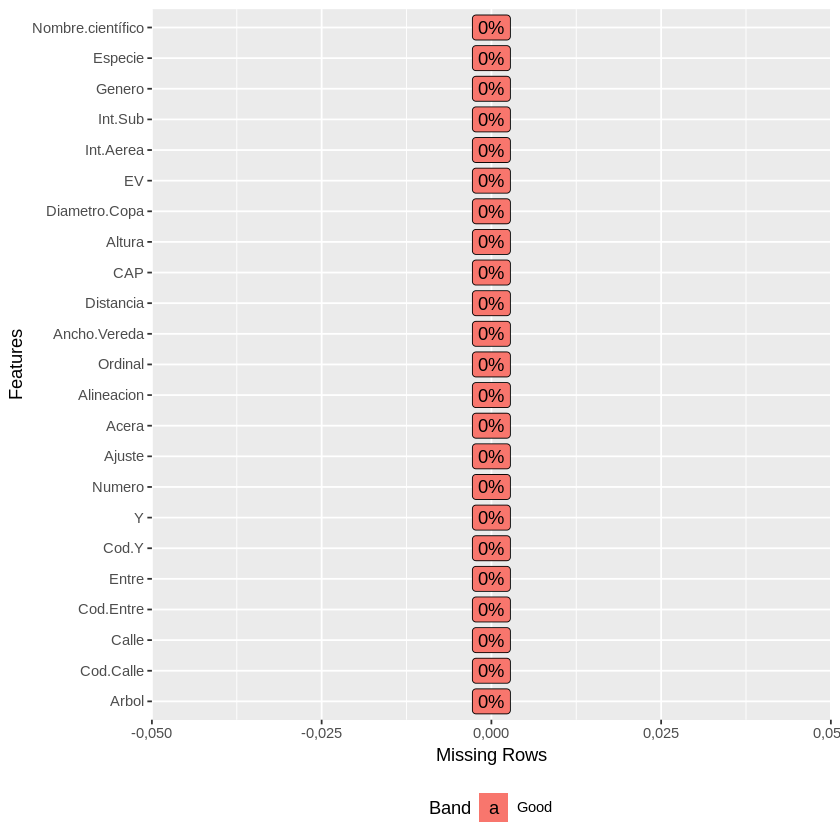

In [48]:
# Graficar porcentaje (%) de valores faltantes o nulos, por columna
plot_missing(dataset)

#### ATENTOS!
Suena un poco extraño que ninguna columna del dataset tenga valores faltantes. ¿Realmente existe un valor apropiado para todas las columnas en todas las filas de mi dataset?

Es momento de investigar que entiende la libreria DataExplorer por "missing value". Por ejemplo:

- ¿Que pasa con los strings vacíos ""? Es un missing value?
- También podría pasar que en mi fuente de datos "-1" se considera como un missing value para una columna de tipo numética.

De repente podemos hacer algunas consultas para contar cantidad de valores "" en algunas columnas que nos parezcan interesantes de analizar.

In [27]:
# Recordemos que columnas tiene el dataset
colnames(dataset)

[1] "Arbol"             "Cod.Calle"         "Calle"            
 [4] "Cod.Entre"         "Entre"             "Cod.Y"            
 [7] "Y"                 "Numero"            "Ajuste"           
[10] "Acera"             "Alineacion"        "Ordinal"          
[13] "Ancho.Vereda"      "Distancia"         "CAP"              
[16] "Altura"            "Diametro.Copa"     "EV"               
[19] "Int.Aerea"         "Int.Sub"           "Genero"           
[22] "Especie"           "Nombre.científico"

In [28]:
# Vamos a contar cantidad de valores "" en las siguientes columnas:

# Imprimo cantidad
print("Cantidad de Valores Vacios:")

cantDiametroCopaVacio <- dataset %>% select(Diametro.Copa) %>% 
                            filter(Diametro.Copa == '') %>%  
                            count()
print(paste("Diametro.Copa: ", cantDiametroCopaVacio))

[1] "Cantidad de Valores Vacios:"
[1] "Diametro.Copa:  248"


Excelente, nuestras sospechas son correctas, existen filas que tienen el valor "" por ejemplo en la columna *Copa.Diametro* y la libreria DataExplorer NO lo está considerando como un missing value.

Para solucionar este problema vamos a remplazar todos los valores "" por NA, que es la representación interna utilizada por defecto por ```dplyr``` para missing values. Luego, DataExplorer deberia tenerlo en cuenta como missing value. Notar que tenemos que realizar esta transformación para todas las columnas del dataset, puesto que en principio podríamos tener el mismo problema en todas.

In [53]:
dim(dataset)

[1] 4910   23

In [55]:
str(dataset)

'data.frame':	4910 obs. of  23 variables:
 $ Arbol            : Factor w/ 4910 levels "1","100","1000",..: 792 793 794 4341 4342 4343 4344 4345 4346 4347 ...
 $ Cod.Calle        : Factor w/ 81 levels "","126","1482",..: 77 77 77 77 77 77 77 77 77 77 ...
 $ Calle            : Factor w/ 80 levels "","18 DE JULIO AVENIDA",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Cod.Entre        : Factor w/ 97 levels ""," Entre","0",..: 56 56 56 35 35 35 36 36 36 36 ...
 $ Entre            : Factor w/ 95 levels "","18 DE JULIO AVENIDA",..: 38 38 38 67 67 67 5 5 5 5 ...
 $ Cod.Y            : Factor w/ 93 levels ""," Y","0","1122",..: 70 70 70 38 38 38 43 43 43 43 ...
 $ Y                : Factor w/ 91 levels "","18 DE JULIO AVENIDA",..: 75 75 75 9 9 9 23 23 23 23 ...
 $ Numero           : Factor w/ 1190 levels ""," Numero","0",..: 1 1 1 1050 1053 3 1063 1063 1087 1092 ...
 $ Ajuste           : Factor w/ 192 levels "",".","0","1006",..: 186 186 186 1 1 184 1 1 1 1 ...
 $ Acera            : Factor w/ 4 levels "","Acer

In [29]:
# Remplazo valores string vacío por NA utilizando mutate_all
dataset <- mutate_all(dataset, funs(na_if(.,"")))
profile_missing(dataset)

feature,num_missing,pct_missing
Arbol,0,"0,000000000"
Cod.Calle,1,"0,000203666"
Calle,2,"0,000407332"
Cod.Entre,1,"0,000203666"
Entre,41,"0,008350305"
Cod.Y,1,"0,000203666"
Y,41,"0,008350305"
Numero,166,"0,033808554"
Ajuste,3651,"0,743584521"
Acera,1,"0,000203666"


Algunas columnas no se están tomando como numericas cuando leo el csv y esto hace que no se tomen como variables contionúas. De los [metadatos](https://catalogodatos.gub.uy/dataset/censo-de-arbolado-2008/resource/c799548d-e9bb-492b-9179-53de2b748d43) del dataset, puedo inferir cuales son las columnas que son numéricas. De esta forma puedo castearlas en el dataframe como numéricas y hacer el profiling de nuevo.

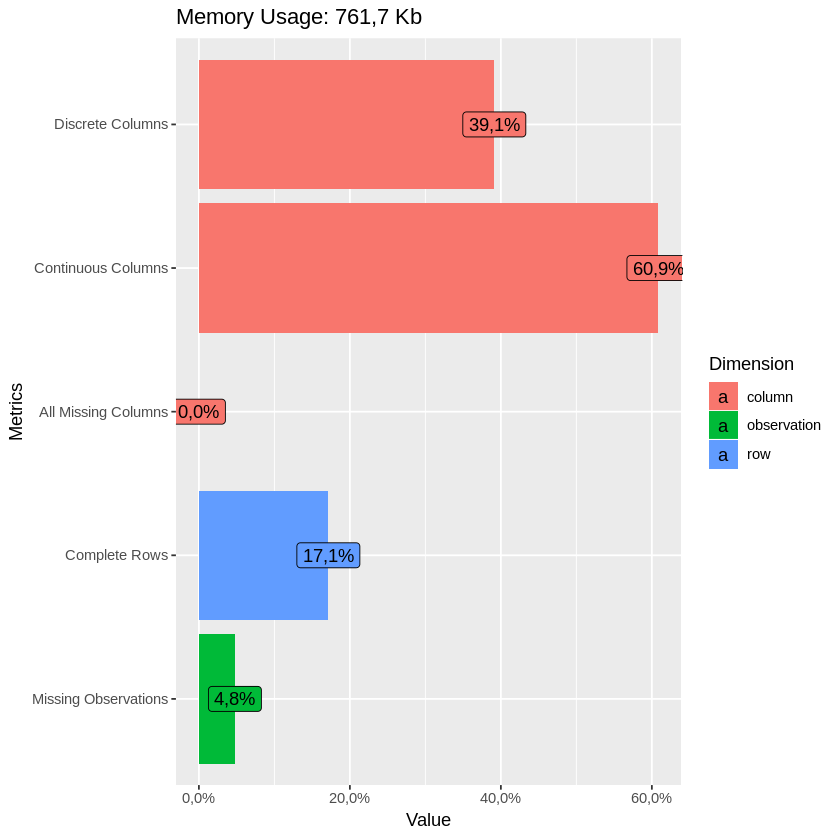

In [30]:
dataset[, c(1:2,4,6,8,10:16,19,20)] <- sapply(dataset[, c(1:2,4,6,8,10:16,19,20)], as.numeric)
plot_intro(dataset)

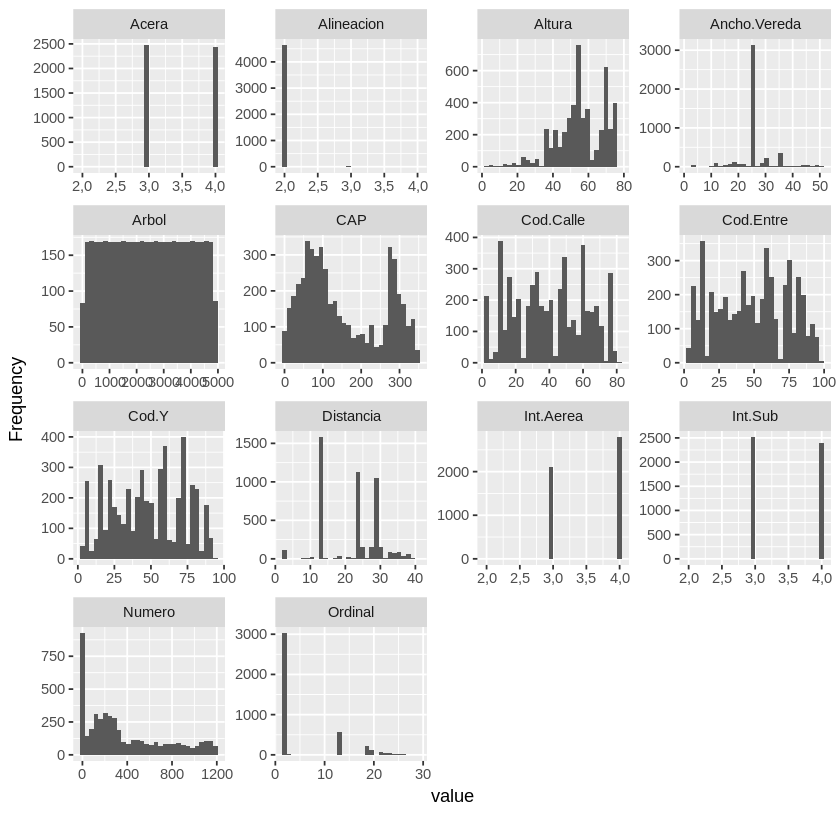

In [31]:
# Puedo hacer histogramas de las variables continuas
plot_histogram(dataset)

<a id='Calidad-Datos'></a>
## Calidad de Datos (OPCIONAL) 
[Inicio ▲](#Indice)

<a id='Definicion'></a>
### Definición

Es muy difiícil dar una definición simple y concisa de que entendemos por "Calidad de un Dato". Es un concepto multi-facético, donde existen diferentes dimensiones.

> "Even though quality cannot be defined, you know what it
is” – Robert Pirsig (filósofo, define la “metafísica de la calidad”)

<br />

**Algunas dimensiones**
- **Exactitud**: Cuán **preciso** es un dato, por ejemplo un precio, $10 ó $10,90, o que tan **correcto** por ejemplo un apellido "Martnez" ó "Martínez"  
- **Completitud**: Cuan representativo son mis datos, contienen todos los valores de mi realidad, cuantos NULOS tengo.
- **Frescura**: Que tan viejos son mis datos, cuando fueron actualizados por ultima vez.
- **Consistencia**: Son consistentes mis datos en relación al dominio y sus restricciones, por ejemplo una venta sobre un producto que no existe en la base de datos. 
- **Unicidad**: Hay datos duplicados, información contradictoria entre ellos, por ejemplo el mismo usuario dos veces con diferente teléfono.

Más información sobre dimensiones de calidad [aquí](https://eva.fing.edu.uy/pluginfile.php/177507/mod_resource/content/1/2-Dimensiones%20de%20calidad.pdf)

**Ejemplo**

La mejor forma de entender problemas de calidad de un dato es ver un ejemplo y para ello veamos un caso de diferentes dimensiones de la calidad, en una Tabla de Peliculas:

![CalidadDatosEjemplo](https://github.com/efviodo/data-science/raw/master/courses/utec/figures/calidad_datos_ejemplo.png)

*Fuente*: Diapositiva de presentación Curso de Calidad de Datos[1], Facultad de Ingeniería, UdelaR

La Calidad de Datos es una área entera en si misma y existen infinidad de cursos y libros disponibles para introducirse en él. En caso de etar interesado en profunidzar en alguno de los temas mencionados puede recurrir a la Bibliografía recomendada.

<a id='Bibliografia'></a>
## Bibliografía
[Inicio ▲](#Indice)

<ol>
    <li> Curso Calidad de Datos, Facultad de Ingeniería, Universidad de la República. <br />
        <a href="https://eva.fing.edu.uy/course/view.php?id=1073">https://eva.fing.edu.uy/course/view.php?id=1073</a>
    </li>
    <li>
        Data Quality, Concepts, Methodologies and Techniques - Batini, Carlo, Scannapieco, Monica <br /><a href="https://www.springer.com/us/book/9783540331728">https://www.springer.com/us/book/9783540331728</a>
    </li>
</ol>
    